In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from _helpers import *
from IPython.display import display

In [3]:
F_DOM = 'examples/experiments/hospital2/meta/hospital_domain_all.pkl'
F_DK = 'examples/hospital_dk_cells.pkl'
F_CLEAN = 'testdata/hospital_clean.csv'
F_RAW = 'testdata/hospital.csv'

In [4]:
df_dom, df_dk, df_clean, df_raw = read_data(F_DOM, F_DK, F_CLEAN, F_RAW)

In [6]:
df_ref = combine_df(df_dom, df_dk, df_clean)

In [7]:
df_ref[df_ref.correct_val != df_ref.init_value].groupby('attribute').size()

attribute
Address1            31
City                33
Condition           32
CountyName          39
EmergencyService    27
HospitalName        24
HospitalOwner       27
HospitalType        32
MeasureCode         29
MeasureName         36
PhoneNumber         34
ProviderNumber      28
Sample              31
Score               23
State               26
Stateavg            27
ZipCode             30
dtype: int64

### How many can we actually repair

In [19]:
df_ref.shape

(16773, 7)

In [21]:
df_ref.apply(lambda r: r.correct_val in r.domain, axis=1).sum()

16759

In [20]:
df_ref[df_ref['correct_val'] != df_ref['init_value']].apply(lambda r: r.correct_val in r.domain, axis=1).sum()

495

In [22]:
df_ref[(df_ref['correct_val'] != df_ref['init_value']) & df_ref.is_dk].apply(lambda r: r.correct_val in r.domain, axis=1).sum()

435

# Experiments

## Trained embedding model

Precision (all): 29.2%

Precision (DK): 40.4%

Repair recall: 91%

In [23]:
pref1 = 'examples/experiments/hospital2/results/embed_epochs_10epoch_32batch_0lambda_ALL_attrs'

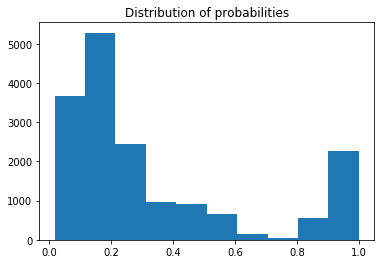

Total cells: 16773
Total errors:  509
Total DK cells:  11038

All predicted
-------------
# of cells (in this subset):  16773
# of errors (in this subset):  509

# correct preds:  8231
# incorrect preds:  8542

# of repairs:  8616

# of repairs (on correct cells):  8144
# of repairs (on incorrect cells):  472

# of correct repairs:  111

precision:  0.01288300835654596
overall recall (/ total errors):  0.2180746561886051
recall (/ errors in this subset):  0.2180746561886051

DK cells (repair precision/recall)
-------------
# of cells (in this subset):  11038
# of errors (in this subset):  435

# correct preds:  4035
# incorrect preds:  7003

# of repairs:  7053

# of repairs (on correct cells):  6655
# of repairs (on incorrect cells):  398

# of correct repairs:  87

precision:  0.01233517652062952
overall recall (/ total errors):  0.17092337917485265
recall (/ errors in this subset):  0.2



In [24]:
_ = analyze_results('%s_validation_at_9_epoch.csv' % pref1, df_ref, None)

In [28]:
init_val_idxs, train_val_idxs, attr_idxs, sdict = model_metadata(pref1 + '_epoch_10')

In [31]:
attr_idxs

{'Address1': 0,
 'City': 1,
 'Condition': 2,
 'CountyName': 3,
 'EmergencyService': 4,
 'HospitalName': 5,
 'HospitalOwner': 6,
 'HospitalType': 7,
 'MeasureCode': 8,
 'MeasureName': 9,
 'PhoneNumber': 10,
 'ProviderNumber': 11,
 'Sample': 12,
 'Score': 13,
 'State': 14,
 'Stateavg': 15,
 'ZipCode': 16}

In [32]:
attrW_df(attr_idxs, sdict)

weight                                               \
givenattr/coattr Address1   City Condition CountyName EmergencyService   
attr                                                                     
Address1              NaN  0.048     0.009      0.024            0.015   
City                0.075    NaN     0.030      0.094            0.022   
Condition           0.035  0.041       NaN      0.047            0.075   
CountyName          0.106  0.164     0.022        NaN            0.026   
EmergencyService    0.180  0.114     0.043      0.240              NaN   
HospitalName        0.048  0.045     0.058      0.087            0.095   
HospitalOwner       0.127  0.140     0.019      0.035            0.031   
HospitalType        0.040  0.039     0.113      0.053            0.101   
MeasureCode         0.049  0.043     0.074      0.063            0.072   
MeasureName         0.074  0.047     0.082      0.045            0.076   
PhoneNumber         0.075  0.162     0.034      0.081            0.029   
ProviderNumber      0.076  0.178     0.042      0.107            0.024   
Sample              0.065  0.027     0.059      0.095            0.029   
Score               0.049  0.038     0.107      0.043            0.125   
State               0.049  0.055     0.040      0.116            0.032   
Stateavg            0.029  0.028     0.096      0.071            0.066   
ZipCode             0.110  0.073     0.030      0.131            0.027   

                                                                      \
givenattr/coattr HospitalName HospitalOwner HospitalType MeasureCode   
attr                                                                   
Address1                0.089         0.010        0.016       0.011   
City                    0.133         0.064        0.038       0.023   
Condition               0.045         0.075        0.089       0.116   
CountyName              0.061         0.017        0.025       0.015   
EmergencyService        0.071         0.029        0.026       0.040   
HospitalName              NaN         0.065        0.056       0.093   
HospitalOwner           0.049           NaN        0.040       0.018   
HospitalType            0.034         0.113          NaN       0.083   
MeasureCode             0.038         0.049        0.086         NaN   
MeasureName             0.039         0.112        0.100       0.047   
PhoneNumber             0.179         0.023        0.017       0.016   
ProviderNumber          0.136         0.063        0.037       0.026   
Sample                  0.136         0.042        0.041       0.037   
Score                   0.053         0.106        0.088       0.099   
State                   0.056         0.041        0.054       0.030   
Stateavg                0.029         0.070        0.089       0.150   
ZipCode                 0.192         0.036        0.043       0.023   

                                                                              \
givenattr/coattr MeasureName PhoneNumber ProviderNumber Sample  Score  State   
attr                                                                           
Address1               0.012       0.255          0.278  0.013  0.018  0.019   
City                   0.021       0.161          0.077  0.028  0.017  0.027   
Condition              0.106       0.043          0.046  0.027  0.064  0.092   
CountyName             0.017       0.130          0.196  0.022  0.015  0.020   
EmergencyService       0.034       0.026          0.038  0.024  0.026  0.027   
HospitalName           0.107       0.034          0.036  0.036  0.062  0.065   
HospitalOwner          0.032       0.174          0.115  0.025  0.022  0.030   
HospitalType           0.078       0.036          0.039  0.041  0.036  0.136   
MeasureCode            0.071       0.048          0.059  0.060  0.082  0.065   
MeasureName              NaN       0.059          0.029  0.066  0.038  0.093   
PhoneNumber            0.020         NaN          0.129  